In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("general_data.csv")
df = df.copy()

In [19]:
print(df.head())

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0

In [81]:
nulos_companies = df['NumCompaniesWorked'].isnull().sum()
print(nulos_companies)
#Tengo 19 NA que voy a reemplazar por 0 

19


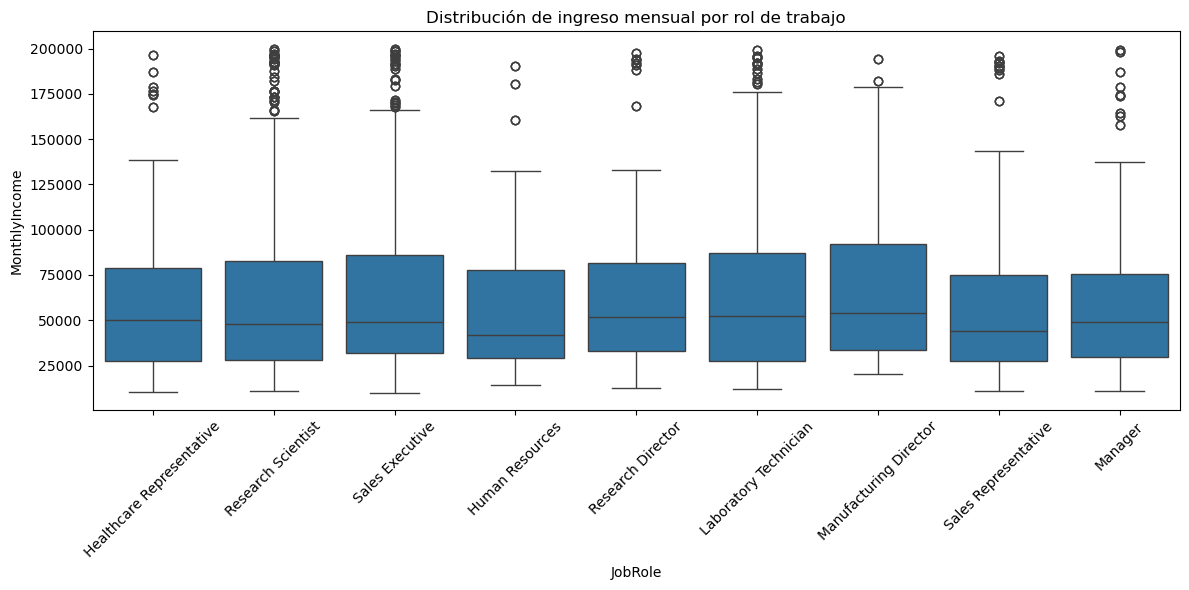

In [162]:
#Ingreso mensual por el tipo de trabajo 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="JobRole", y="MonthlyIncome")
plt.xticks(rotation=45)
plt.title("Distribución de ingreso mensual por rol de trabajo")
plt.tight_layout()
plt.show()



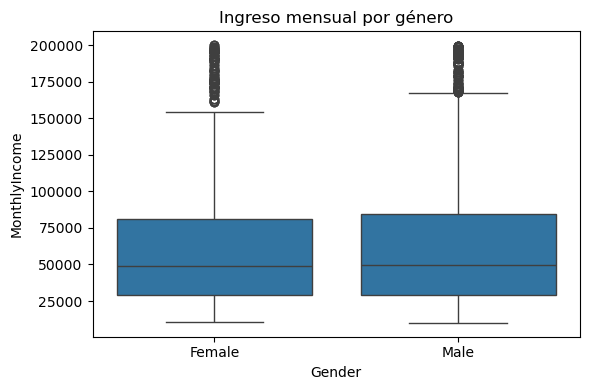

In [164]:
#Ingreso mensual por género
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Gender", y="MonthlyIncome")
plt.title("Ingreso mensual por género")
plt.tight_layout()
plt.show()


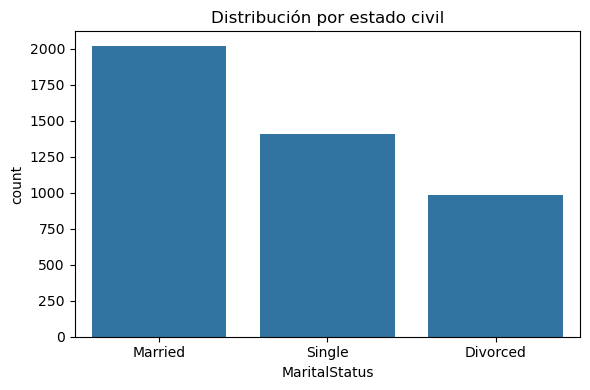

In [166]:
#Empleados por estado civil 
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="MaritalStatus")
plt.title("Distribución por estado civil")
plt.tight_layout()
plt.show()


In [ ]:
#Nueva columna "CareerScore" puntaje compuesto que mide la “posición profesional” combinando nivel de puesto, ingreso, experiencia y estabilidad.
# Componentes:
# JobLevel (1–5)
# MonthlyIncome 
# Estabilidad:  1 / (1 + NumCompaniesWorked) (penaliza la inestabilidad laboral)
# Experiencia estimada: son mis TotalWorkingYears

CareerScore = (JobLevel_normalizado + MonthlyIncome_normalizado + Estabilidad + Totaldeañostrabajando) / 4

In [44]:
# Mis 8 columnas más las que necesito
df_selected = df[[
     "EmployeeID", "Gender", "JobLevel", "JobRole", "MaritalStatus",
    "MonthlyIncome", "NumCompaniesWorked", "Over18", "Age", "YearsSinceLastPromotion", "TotalWorkingYears"
]].copy()

# Mis nulos a 0 
df_selected["NumCompaniesWorked"] = df_selected["NumCompaniesWorked"].fillna(0)
df_selected["TotalWorkingYears"] = df_selected["TotalWorkingYears"].fillna(0)

# Normalizar JobLevel y MonthlyIncome
scaler = MinMaxScaler()
df_selected[["JobLevel_norm", "MonthlyIncome_norm"]] = scaler.fit_transform(
    df_selected[["JobLevel", "MonthlyIncome"]]
)

# Estabilidad
df_selected["Estabilidad"] = 1 / (1 + df_selected["NumCompaniesWorked"])

# Normalizar TotalWorkingYears 
df_selected["Experiencia_norm"] = MinMaxScaler().fit_transform(
    df_selected[["TotalWorkingYears"]]
)

# CareerScore 
df_selected["CareerScore"] = (
    df_selected["JobLevel_norm"] +
    df_selected["MonthlyIncome_norm"] +
    df_selected["Estabilidad"] +
    df_selected["Experiencia_norm"]
) / 4

print(df_selected[["EmployeeID", "CareerScore"]].head())


   EmployeeID  CareerScore
0           1     0.290637
1           2     0.329364
2           3     0.584916
3           4     0.365011
4           5     0.123799


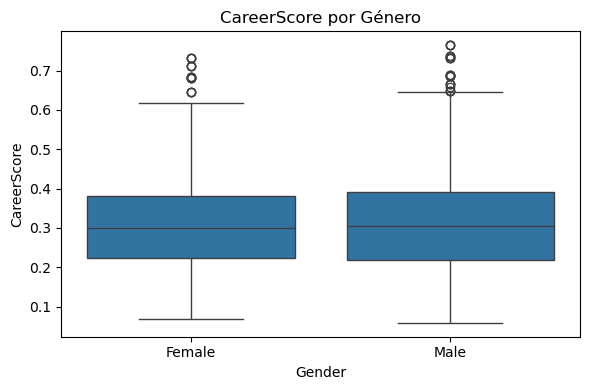

In [46]:
# CareerScore vs Gender
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_selected, x="Gender", y="CareerScore")
plt.title("CareerScore por Género")
plt.tight_layout()
plt.show()


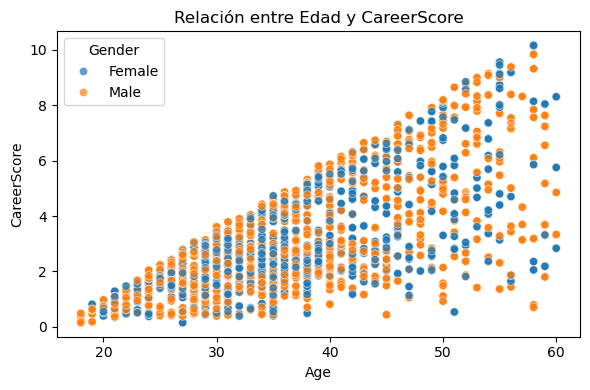

In [26]:
#CareerScore vs Age
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_selected, x="Age", y="CareerScore", hue="Gender", alpha=0.7)
plt.title("Relación entre Edad y CareerScore")
plt.tight_layout()
plt.show()



In [32]:
print(df_selected[["Age", "CareerScore"]].corr())


                  Age  CareerScore
Age          1.000000     0.675064
CareerScore  0.675064     1.000000


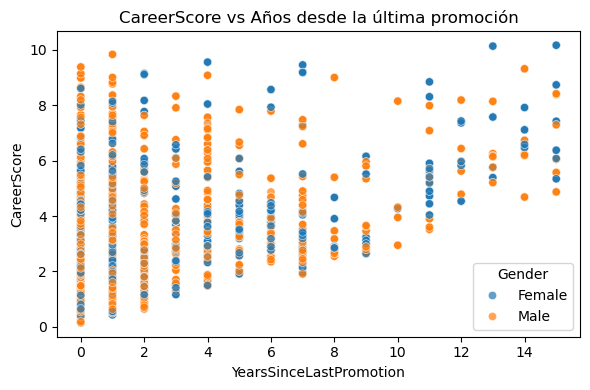

In [28]:
# CareerScore vs YearsSinceLastPromotion
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_selected, x="YearsSinceLastPromotion", y="CareerScore", hue="Gender", alpha=0.7)
plt.title("CareerScore vs Años desde la última promoción")
plt.tight_layout()
plt.show()



In [30]:
print(df_selected[["YearsSinceLastPromotion", "CareerScore"]].corr())


                         YearsSinceLastPromotion  CareerScore
YearsSinceLastPromotion                 1.000000     0.409618
CareerScore                             0.409618     1.000000
